In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5,5),np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def calculate_metrics(image_path_input, image_path_ground_truth):
    # Read the original image
    image_path_input = input("Enter the original image filename: ")
    image_path_ground_truth = input("Enter the ground truth image filename: ")

    input_image = cv2.imread(image_path_input)
    if input_image is None:
        raise FileNotFoundError(f"Input image not found at path: {image_path_input}")

    ground_truth_image = cv2.imread(image_path_ground_truth, cv2.IMREAD_GRAYSCALE)
    if ground_truth_image is None:
        raise FileNotFoundError(f"Ground truth image not found at path: {image_path_ground_truth}")

    input_image = cv2.resize(input_image, (1920, 1920))
    ground_truth_image = cv2.resize(ground_truth_image, (1920, 1920))

    blue_sky_mask = detect_blue_sky(input_image)
    sun_mask = detect_sun(input_image)

    blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

    if sun_mask is not None:
        sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
    else:
        sun_and_blue_sky_removed = blue_sky_removed

    if sun_mask is not None:
        cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, sun_mask))
    else:
        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

    if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
        cloud_area_mask = cloud_area_mask.astype(np.uint8)
        kernel = np.ones((5,5),np.uint8)
        cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)
        non_cloud_area_mask = cv2.bitwise_not(cloud_area_mask)

        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cloud_area_mask, cmap='gray')
        plt.title('Cloud Area')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Cloud area mask is None or empty.")

    ground_truth_mask = cv2.threshold(ground_truth_image, 200, 1, cv2.THRESH_BINARY)[1]
    ground_truth_flattened = ground_truth_mask.flatten()

    # Using the binary mask for classification directly
    classification = (cloud_area_mask > 0).astype(np.uint8).flatten()

    conf_matrix = confusion_matrix(ground_truth_flattened, classification)

    class_names = ['Background', 'Cloud']

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Clouds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

Enter the original image filename: Frame_  00001   (60).jpg
Enter the ground truth image filename: Frame_  00001   (60).jpg___fuse.png


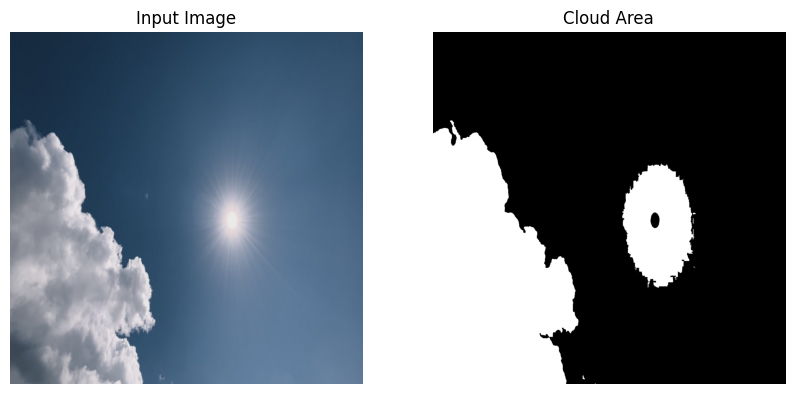

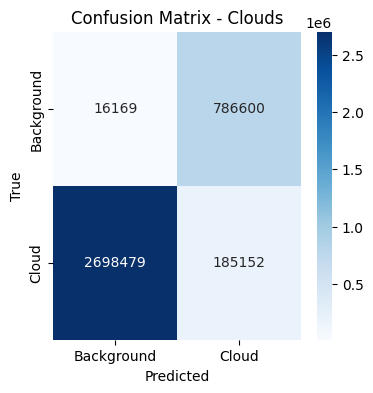

Precision: 0.1905342103746635
Recall: 0.06420793783948085
F1-score: 0.09604856378730725


In [ ]:
calculate_metrics(image_path_input, image_path_ground_truth)

Enter the original image filename: Frame_  00001   (125).jpg
Enter the ground truth image filename: Frame_  00001   (125).jpg___fuse.png


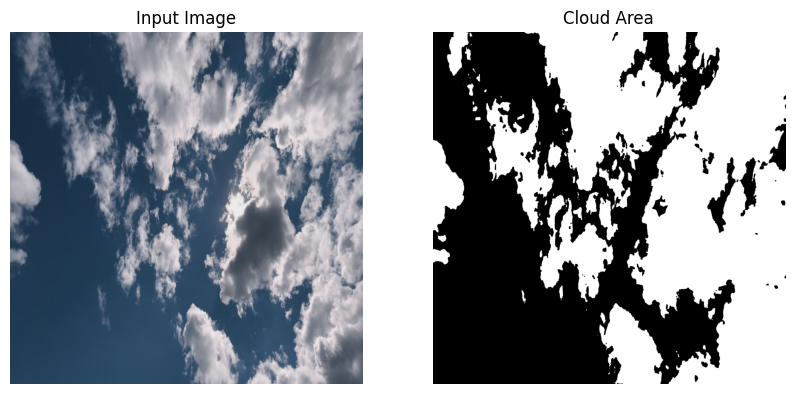

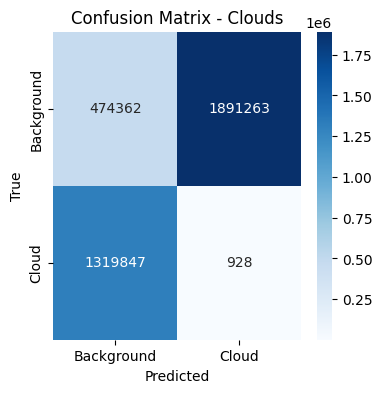

Precision: 0.0004904367476644799
Recall: 0.0007026177812269311
F1-score: 0.0005776593963334813


In [ ]:
calculate_metrics(image_path_input, image_path_ground_truth)

Enter the original image filename: Frame_  00001   (6).jpg
Enter the ground truth image filename: Frame_  00001   (6).jpg___fuse.png


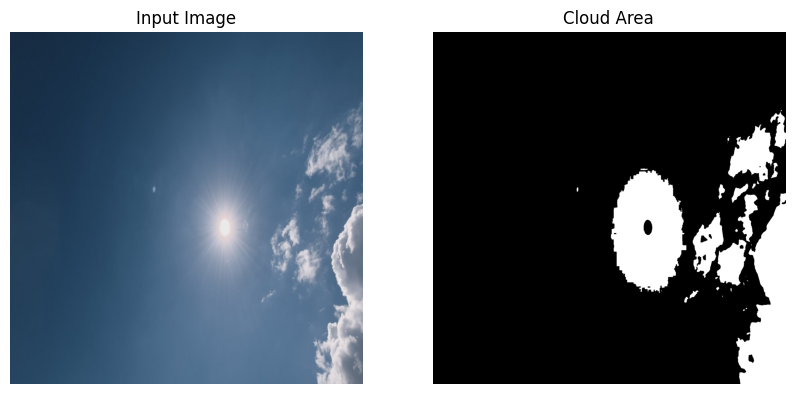

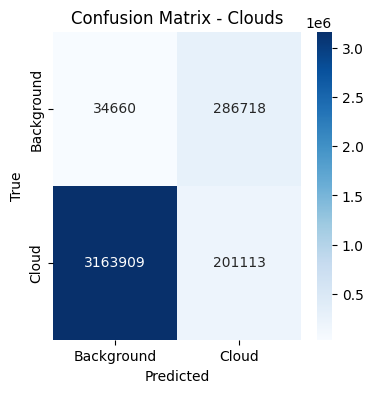

Precision: 0.4122595734998391
Recall: 0.059765731100717916
F1-score: 0.10439692352653995


In [ ]:
calculate_metrics(image_path_input, image_path_ground_truth)

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5,5),np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def calculate_metrics(image_path_input, image_path_ground_truth):
    input_image = cv2.imread(image_path_input)
    if input_image is None:
        raise FileNotFoundError(f"Input image not found at path: {image_path_input}")

    ground_truth_image = cv2.imread(image_path_ground_truth, cv2.IMREAD_GRAYSCALE)
    if ground_truth_image is None:
        raise FileNotFoundError(f"Ground truth image not found at path: {image_path_ground_truth}")

    input_image = cv2.resize(input_image, (1920, 1920))
    ground_truth_image = cv2.resize(ground_truth_image, (1920, 1920))

    blue_sky_mask = detect_blue_sky(input_image)
    sun_mask = detect_sun(input_image)

    blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

    if sun_mask is not None:
        sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
    else:
        sun_and_blue_sky_removed = blue_sky_removed

    if sun_mask is not None:
        cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, sun_mask))
    else:
        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

    if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
        cloud_area_mask = cloud_area_mask.astype(np.uint8)
        kernel = np.ones((5,5),np.uint8)
        cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)
        non_cloud_area_mask = cv2.bitwise_not(cloud_area_mask)
        result_image = cv2.cvtColor(sun_and_blue_sky_removed, cv2.COLOR_BGR2RGB)
        result_image[non_cloud_area_mask == 255] = [135, 150, 235]

        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cloud_area_mask, cmap='gray')
        plt.title('Cloud Area')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Cloud area mask is None or empty.")

    ground_truth_mask = cv2.threshold(ground_truth_image, 200, 1, cv2.THRESH_BINARY)[1]
    ground_truth_flattened = ground_truth_mask.flatten()

    # Using the binary mask for classification directly
    classification = (cloud_area_mask > 0).astype(np.uint8).flatten()

    conf_matrix = confusion_matrix(ground_truth_flattened, classification)

    class_names = ['Background', 'Cloud']

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Clouds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

    # Splitting the classified image into 8x8 matrix and counting pixels
    if cloud_area_mask is not None:
        rows, cols = cloud_area_mask.shape
        partition_size_rows = rows // 8
        partition_size_cols = cols // 8
        partition_counts = np.zeros((8, 8), dtype=int)

        for i in range(8):
            for j in range(8):
                partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                             j * partition_size_cols: (j + 1) * partition_size_cols]
                partition_counts[i, j] = np.count_nonzero(partition)

        print("Partition Counts:")
        print(partition_counts)

Enter the original image filename: Frame_  00001   (6).jpg
Enter the ground truth image filename: Frame_  00001   (6).jpg___fuse.png


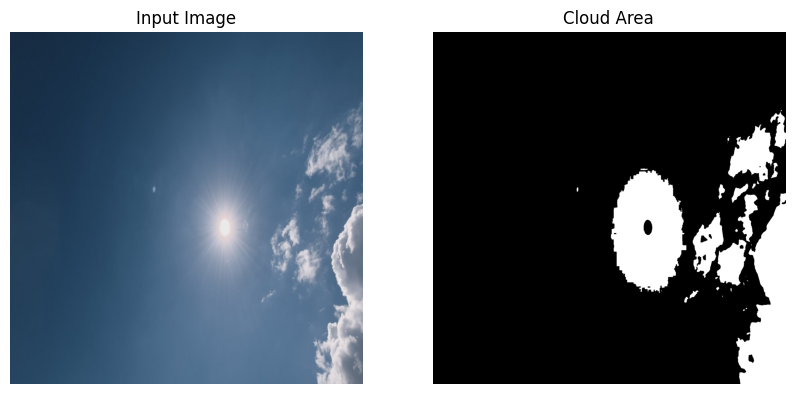

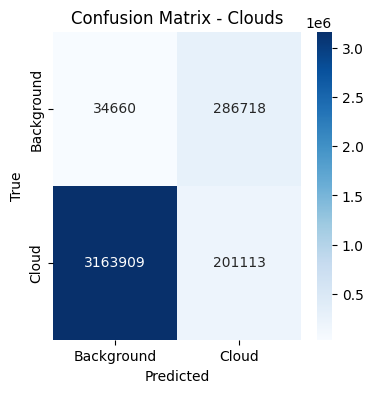

Precision: 0.4122595734998391
Recall: 0.059765731100717916
F1-score: 0.10439692352653995
Partition Counts:
[[    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1603]
 [    0     0     0     0     0     0  5537 33050]
 [    0     0     0   173 31195 18158  7979 18443]
 [    0     0     0     0 49688 39665 22458 35623]
 [    0     0     0     0 33809 24672 29368 38269]
 [    0     0     0     0     0   630   138 37714]
 [    0     0     0     0     0     0  3647 56012]]


In [ ]:
calculate_metrics(image_path_input, image_path_ground_truth)

Enter the original image filename: Frame_  00001   (175).jpg
Enter the ground truth image filename: Frame_  00001   (175).jpg___fuse.png


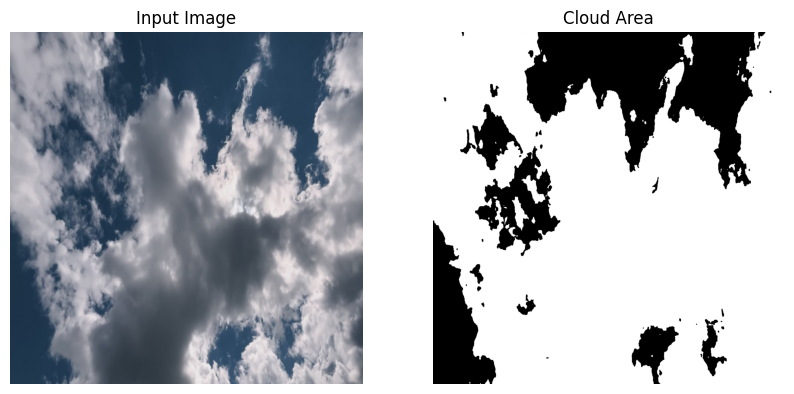

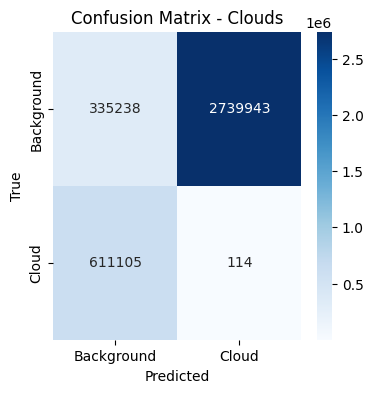

Precision: 4.160497391112667e-05
Recall: 0.00018651252660666635
F1-score: 6.803378772742084e-05
Partition Counts:
[[57354 57600 17854     0     0 11272   362 44321]
 [57361 51762 14772 34566 10526 18719  1298 51806]
 [53061 23402 51457 57600 31061 56719 27142 57505]
 [57600 31699 31789 57600 55913 56654 47686 54278]
 [47302 30836 29538 57600 57600 57600 57600 57600]
 [23073 55034 57244 57600 57600 57600 57600 57600]
 [ 6590 56374 53727 57600 53579 49524 52150 57600]
 [ 1788 44537 57522 57600 43177 45230 45693 57600]]


In [ ]:
calculate_metrics(image_path_input, image_path_ground_truth)

Enter the original image filename: Frame_  00001   (125).jpg
Enter the ground truth image filename: Frame_  00001   (125).jpg___fuse.png


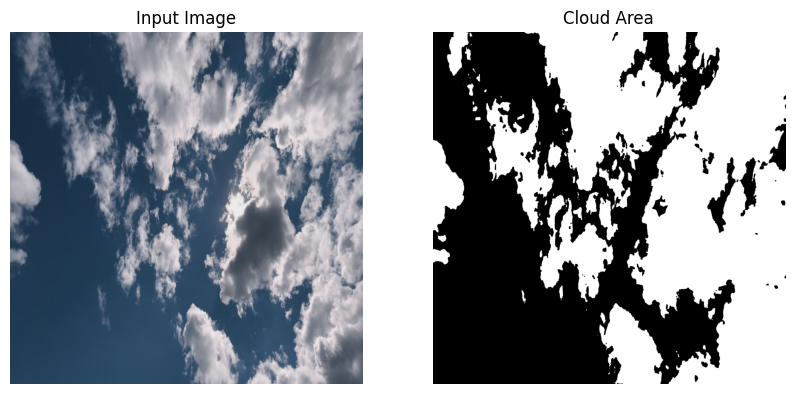

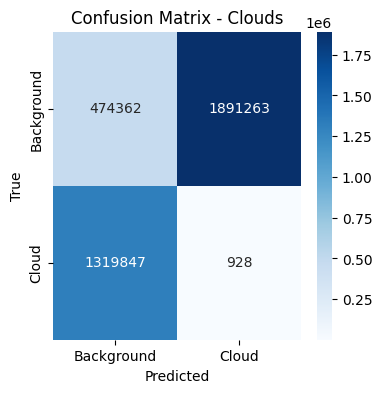

Precision: 0.0004904367476644799
Recall: 0.0007026177812269311
F1-score: 0.0005776593963334813
Partition Counts:
[[18504    30 29465 57600 40227 22535 47740 57600]
 [ 2233  9558 10069 55924 54959 33194 51638 57194]
 [ 7082 33199 21240 49313 38871 39437 54631 44754]
 [34123 11400 33157 24144 16328 53127 44434 41471]
 [ 8606     0 18552 36167 14478 55509 50547 56770]
 [ 4984     0 20658 33950 23318 54586 52054 57074]
 [    0     0   619  5198 30339  9190 29708 57600]
 [    0     0     0  1719 50392 22017 45375 57600]]


In [ ]:
image_path_input = input("Enter the original image filename: ")
image_path_ground_truth = input("Enter the ground truth image filename: ")
calculate_metrics(image_path_input, image_path_ground_truth)

Enter the original image filename: Frame_  00001   (5).jpg
Enter the ground truth image filename: Frame_  00001   (5).jpg___fuse.png


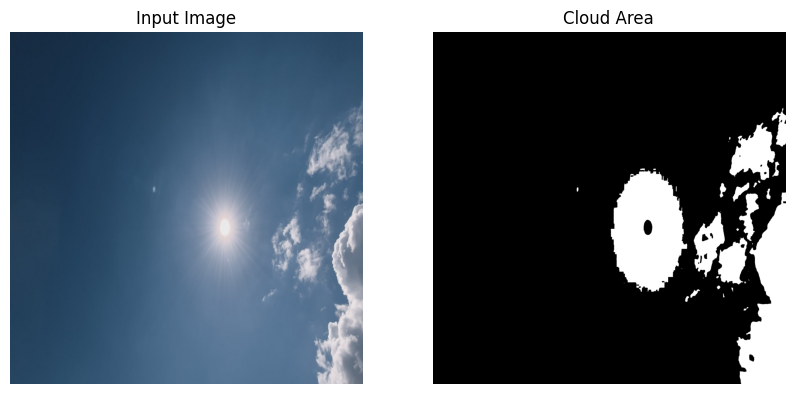

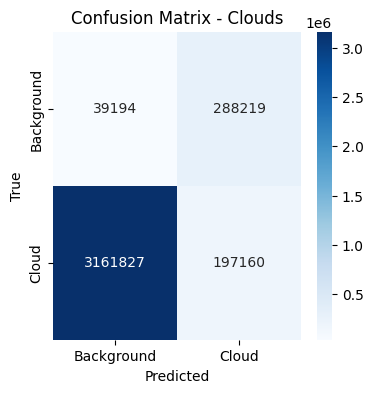

Precision: 0.4061980431786295
Recall: 0.05869626765450417
F1-score: 0.1025708790474164
Partition Counts:
[[    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0  2047]
 [    0     0     0     0     0     0  4729 34303]
 [    0     0     0   182 31222 18768  7073 17851]
 [    0     0     0     0 49632 39517 23754 35525]
 [    0     0     0     0 33809 23495 28669 37455]
 [    0     0     0     0     0   509   240 37480]
 [    0     0     0     0     0     0  2801 56318]]


In [ ]:
image_path_input = input("Enter the original image filename: ")
image_path_ground_truth = input("Enter the ground truth image filename: ")
calculate_metrics(image_path_input, image_path_ground_truth)

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5,5),np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def calculate_metrics(image_path_input, image_path_ground_truth):
    input_image = cv2.imread(image_path_input)
    if input_image is None:
        raise FileNotFoundError(f"Input image not found at path: {image_path_input}")

    ground_truth_image = cv2.imread(image_path_ground_truth, cv2.IMREAD_GRAYSCALE)
    if ground_truth_image is None:
        raise FileNotFoundError(f"Ground truth image not found at path: {image_path_ground_truth}")

    input_image = cv2.resize(input_image, (1920, 1920))
    ground_truth_image = cv2.resize(ground_truth_image, (1920, 1920))

    blue_sky_mask = detect_blue_sky(input_image)
    sun_mask = detect_sun(input_image)

    blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

    if sun_mask is not None:
        sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
    else:
        sun_and_blue_sky_removed = blue_sky_removed

    if sun_mask is not None:
        cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, sun_mask))
    else:
        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

    if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
        cloud_area_mask = cloud_area_mask.astype(np.uint8)
        kernel = np.ones((5,5),np.uint8)
        cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)
        non_cloud_area_mask = cv2.bitwise_not(cloud_area_mask)
        result_image = cv2.cvtColor(sun_and_blue_sky_removed, cv2.COLOR_BGR2RGB)
        result_image[non_cloud_area_mask == 255] = [135, 150, 235]

        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cloud_area_mask, cmap='gray')
        plt.title('Cloud Area')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Cloud area mask is None or empty.")

    ground_truth_mask = cv2.threshold(ground_truth_image, 200, 1, cv2.THRESH_BINARY)[1]
    ground_truth_flattened = ground_truth_mask.flatten()

    # Using the binary mask for classification directly
    classification = (cloud_area_mask > 0).astype(np.uint8).flatten()

    conf_matrix = confusion_matrix(ground_truth_flattened, classification)

    class_names = ['Background', 'Cloud']

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Clouds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

    # Cohen's Kappa calculation
    kappa_score = cohen_kappa_score(ground_truth_flattened, classification)
    print("Cohen's Kappa:", kappa_score)

    # Splitting the classified image into 8x8 matrix and counting pixels
    if cloud_area_mask is not None:
        rows, cols = cloud_area_mask.shape
        partition_size_rows = rows // 8
        partition_size_cols = cols // 8
        partition_counts = np.zeros((8, 8), dtype=int)

        for i in range(8):
            for j in range(8):
                partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                             j * partition_size_cols: (j + 1) * partition_size_cols]
                partition_counts[i, j] = np.count_nonzero(partition)

        print("Partition Counts:")
        print(partition_counts)

Enter the original image filename: Frame_  00001   (41).jpg
Enter the ground truth image filename: Frame_  00001   (41).jpg___fuse.png


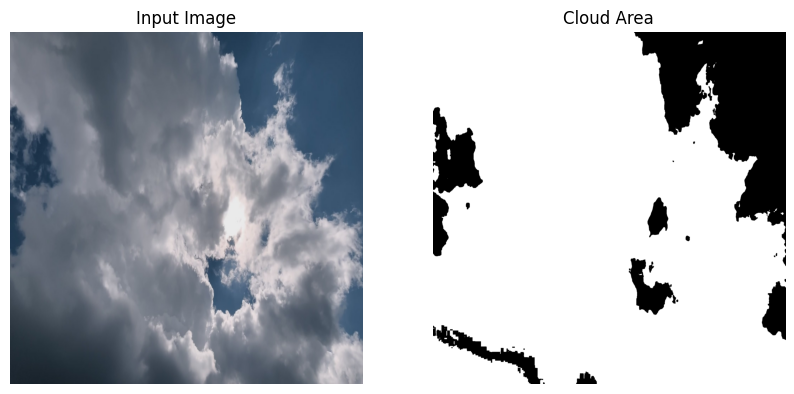

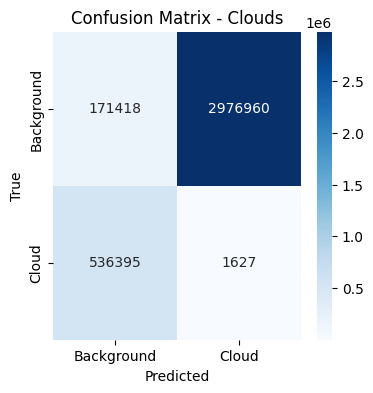

Precision: 0.0005462321563882472
Recall: 0.0030240399091486965
F1-score: 0.0009253232304188496
Cohen's Kappa: -0.3272104421758748
Partition Counts:
[[57600 57600 57600 57600 48294  3263  2189     0]
 [54919 57600 57600 57600 57600 12965 16441     0]
 [19887 57600 57600 57600 57600 50386 27942  2030]
 [22106 56104 57600 57600 57562 55306 56226  4788]
 [41554 57600 57600 57600 54345 47304 55511 41582]
 [56603 57600 57600 57600 42002 50911 57600 51942]
 [49228 57600 57600 57600 50381 51471 57600 34872]
 [49093 41967 46376 52637 57600 57600 57600 57600]]


In [ ]:
image_path_input = input("Enter the original image filename: ")
image_path_ground_truth = input("Enter the ground truth image filename: ")
calculate_metrics(image_path_input, image_path_ground_truth)

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5,5),np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def calculate_metrics(image_path_input, image_path_ground_truth):
    input_image = cv2.imread(image_path_input)
    if input_image is None:
        raise FileNotFoundError(f"Input image not found at path: {image_path_input}")

    ground_truth_image = cv2.imread(image_path_ground_truth, cv2.IMREAD_GRAYSCALE)
    if ground_truth_image is None:
        raise FileNotFoundError(f"Ground truth image not found at path: {image_path_ground_truth}")

    input_image = cv2.resize(input_image, (1920, 1920))
    ground_truth_image = cv2.resize(ground_truth_image, (1920, 1920))

    blue_sky_mask = detect_blue_sky(input_image)
    sun_mask = detect_sun(input_image)

    blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

    if sun_mask is not None:
        sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
    else:
        sun_and_blue_sky_removed = blue_sky_removed

    if sun_mask is not None:
        cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, sun_mask))
    else:
        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

    if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
        cloud_area_mask = cloud_area_mask.astype(np.uint8)
        kernel = np.ones((5,5),np.uint8)
        cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)
        non_cloud_area_mask = cv2.bitwise_not(cloud_area_mask)
        result_image = cv2.cvtColor(sun_and_blue_sky_removed, cv2.COLOR_BGR2RGB)
        result_image[non_cloud_area_mask == 255] = [135, 150, 235]
    else:
        print("Error: Cloud area mask is None or empty.")

    ground_truth_mask = cv2.threshold(ground_truth_image, 200, 1, cv2.THRESH_BINARY)[1]
    ground_truth_flattened = ground_truth_mask.flatten()

    # Using the binary mask for classification directly
    classification = (cloud_area_mask > 0).astype(np.uint8).flatten()

    conf_matrix = confusion_matrix(ground_truth_flattened, classification)

    class_names = ['Background', 'Cloud']

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Clouds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

    # Cohen's Kappa calculation
    kappa_score = cohen_kappa_score(ground_truth_flattened, classification)
    print("Cohen's Kappa:", kappa_score)

    # Visualize the input image, ground truth mask, cloud area mask, and classification result
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(ground_truth_image, cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(cloud_area_mask, cmap='gray')
    plt.title('Cloud Area Mask')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(classification.reshape(1920, 1920), cmap='gray')
    plt.title('Classification Result')
    plt.axis('off')

    plt.show()

    # Splitting the classified image into 8x8 matrix and counting pixels
    if cloud_area_mask is not None:
        rows, cols = cloud_area_mask.shape
        partition_size_rows = rows // 8
        partition_size_cols = cols // 8
        partition_counts = np.zeros((8, 8), dtype=int)

        for i in range(8):
            for j in range(8):
                partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                             j * partition_size_cols: (j + 1) * partition_size_cols]
                partition_counts[i, j] = np.count_nonzero(partition)

        print("Partition Counts:")
        print(partition_counts)

Enter the original image filename: Frame_  00001   (15).jpg
Enter the ground truth image filename: Frame_  00001   (15).jpg___fuse.png


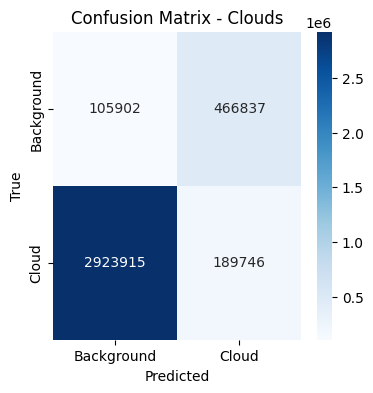

Precision: 0.2889901200609824
Recall: 0.060939838986967435
F1-score: 0.10065449344923035
Cohen's Kappa: -0.2741925664346223


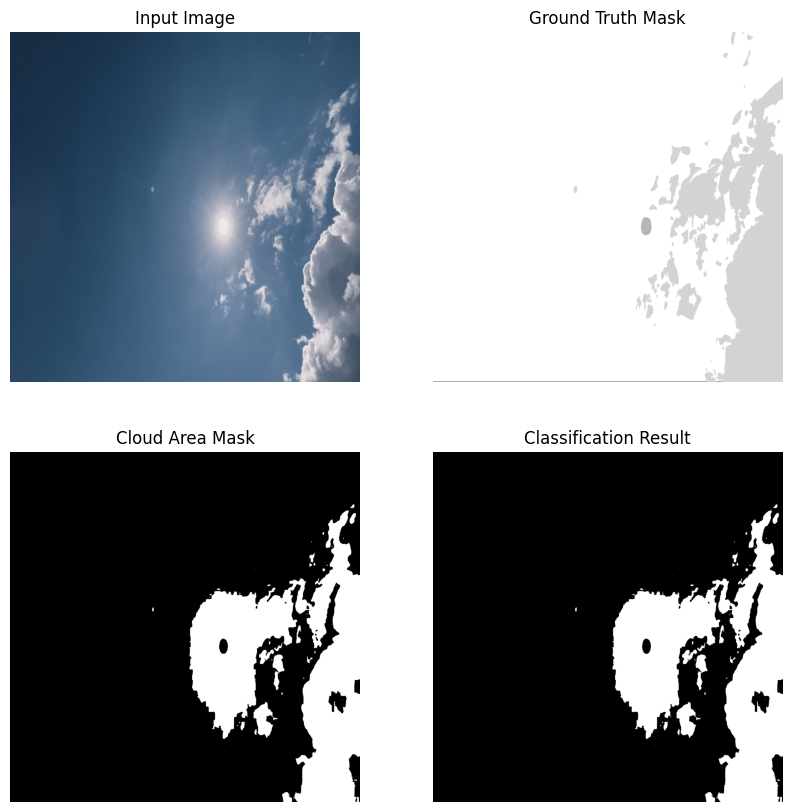

Partition Counts:
[[    0     0     0     0     0     0     0     2]
 [    0     0     0     0     0     0     0 10746]
 [    0     0     0     0     0     7  2689 28742]
 [    0     0     0   159 30184 41187 35297 49076]
 [    0     0     0     0 47487 46439 16323 48307]
 [    0     0     0     0 39427 36829 17328 47878]
 [    0     0     0     0  7568 12456 10160 56799]
 [    0     0     0     0     0     0 23368 48125]]


In [ ]:
image_path_input = input("Enter the original image filename: ")
image_path_ground_truth = input("Enter the ground truth image filename: ")
calculate_metrics(image_path_input, image_path_ground_truth)

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5,5),np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def calculate_metrics(image_path_input, image_path_ground_truth):
    input_image = cv2.imread(image_path_input)
    if input_image is None:
        raise FileNotFoundError(f"Input image not found at path: {image_path_input}")

    ground_truth_image = cv2.imread(image_path_ground_truth, cv2.IMREAD_GRAYSCALE)
    if ground_truth_image is None:
        raise FileNotFoundError(f"Ground truth image not found at path: {image_path_ground_truth}")

    input_image = cv2.resize(input_image, (1920, 1920))
    ground_truth_image = cv2.resize(ground_truth_image, (1920, 1920))

    blue_sky_mask = detect_blue_sky(input_image)
    sun_mask = detect_sun(input_image)

    blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

    if sun_mask is not None:
        sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
    else:
        sun_and_blue_sky_removed = blue_sky_removed

    if sun_mask is not None:
        cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, sun_mask))
    else:
        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

    if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
        cloud_area_mask = cloud_area_mask.astype(np.uint8)
        kernel = np.ones((5,5),np.uint8)
        cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)
        non_cloud_area_mask = cv2.bitwise_not(cloud_area_mask)
        result_image = cv2.cvtColor(sun_and_blue_sky_removed, cv2.COLOR_BGR2RGB)
        result_image[non_cloud_area_mask == 255] = [135, 150, 235]
    else:
        print("Error: Cloud area mask is None or empty.")

    # Invert the ground truth mask
    inverted_ground_truth_mask = cv2.bitwise_not(ground_truth_image)
    ground_truth_mask = cv2.threshold(inverted_ground_truth_mask, 10, 1, cv2.THRESH_BINARY)[1]
    ground_truth_flattened = ground_truth_mask.flatten()

    # Using the binary mask for classification directly
    classification = (cloud_area_mask > 0).astype(np.uint8).flatten()

    conf_matrix = confusion_matrix(ground_truth_flattened, classification)

    class_names = ['Background', 'Cloud']

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Clouds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

    # Cohen's Kappa calculation
    kappa_score = cohen_kappa_score(ground_truth_flattened, classification)
    print("Cohen's Kappa:", kappa_score)

    # Visualize the input image, ground truth mask, cloud area mask, and classification result
    plt.figure(figsize=(20, 20))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(ground_truth_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(cloud_area_mask, cmap='gray')
    plt.title('Cloud Area Mask')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(classification.reshape(1920, 1920), cmap='gray')
    plt.title('Classification Result')
    plt.axis('off')

    plt.show()

    # Splitting the classified image into 8x8 matrix and counting pixels
    if cloud_area_mask is not None:
        rows, cols = cloud_area_mask.shape
        partition_size_rows = rows // 8
        partition_size_cols = cols // 8
        partition_counts = np.zeros((8, 8), dtype=int)

        for i in range(8):
            for j in range(8):
                partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                             j * partition_size_cols: (j + 1) * partition_size_cols]
                partition_counts[i, j] = np.count_nonzero(partition)

        print("Partition Counts:")
        print(partition_counts)

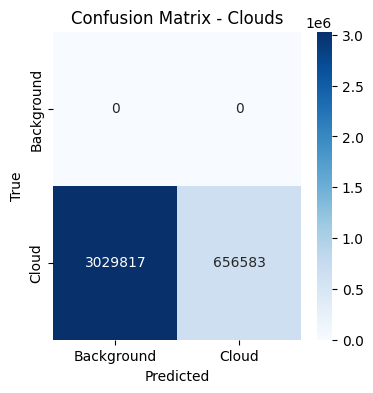

Precision: 1.0
Recall: 0.17810953776041666
F1-score: 0.30236498738309586
Cohen's Kappa: 0.0


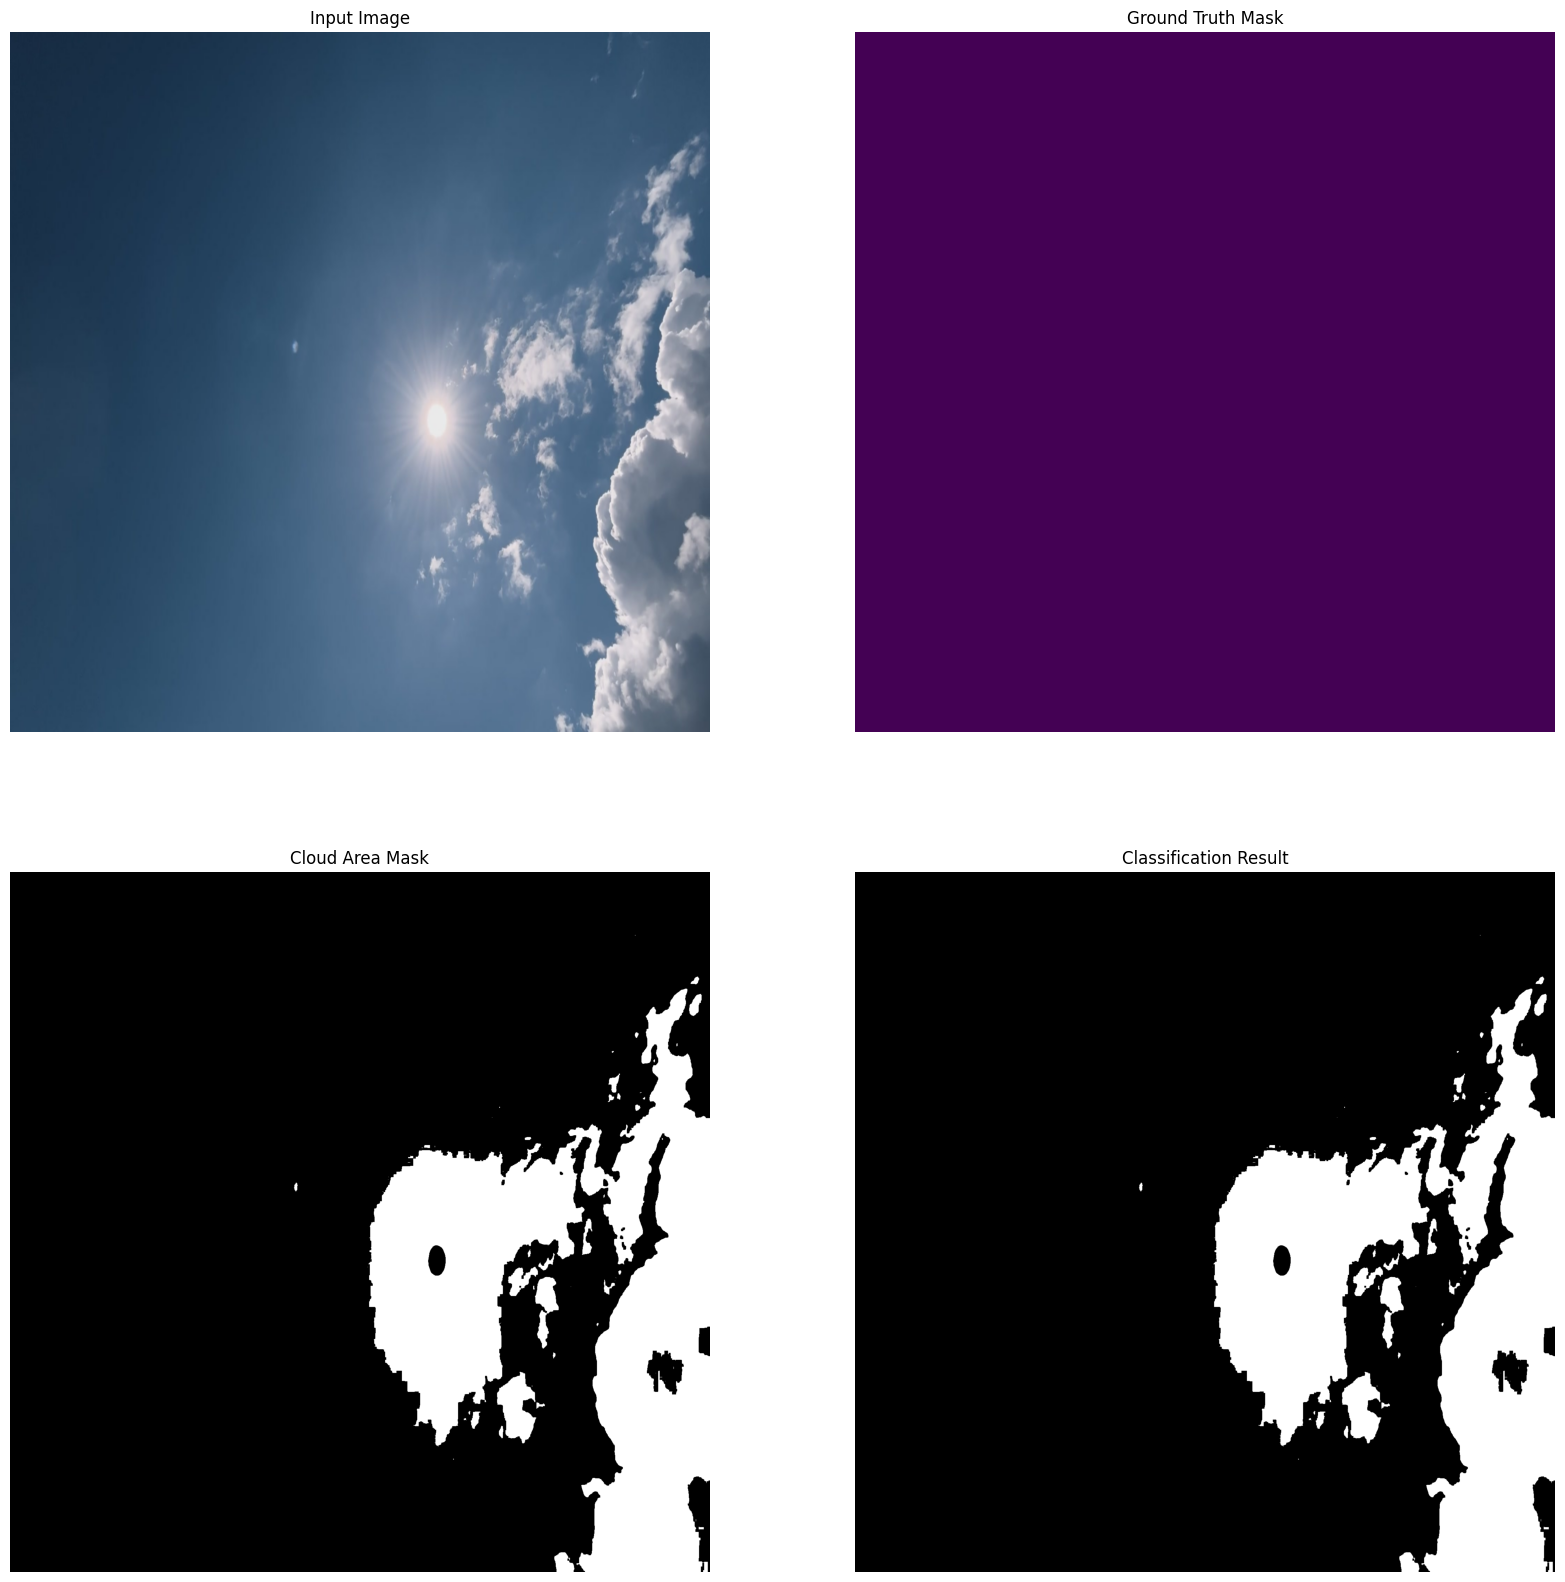

Partition Counts:
[[    0     0     0     0     0     0     0     2]
 [    0     0     0     0     0     0     0 10746]
 [    0     0     0     0     0     7  2689 28742]
 [    0     0     0   159 30184 41187 35297 49076]
 [    0     0     0     0 47487 46439 16323 48307]
 [    0     0     0     0 39427 36829 17328 47878]
 [    0     0     0     0  7568 12456 10160 56799]
 [    0     0     0     0     0     0 23368 48125]]


In [ ]:
image_path_input = 'Frame_  00001   (15).jpg'
image_path_ground_truth = 'Frame_  00001   (15).jpg___fuse.png'
calculate_metrics(image_path_input, image_path_ground_truth)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
        else:
            sun_and_blue_sky_removed = blue_sky_removed

        if sun_mask is not None:
            cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, sun_mask))
        else:
            cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
            cloud_area_mask = cloud_area_mask.astype(np.uint8)
            kernel = np.ones((5, 5), np.uint8)
            cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)


            plt.figure(figsize=(15, 5))
            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
            plt.title('Input Image')
            plt.axis('off')

            plt.subplot(1, 4, 2)
            plt.imshow(cv2.cvtColor(blue_sky_mask, cv2.COLOR_BGR2RGB))
            plt.title('Blue Sky Mask')
            plt.axis('off')

            plt.subplot(1, 4, 3)
            plt.imshow(cv2.cvtColor(sun_mask, cv2.COLOR_BGR2RGB))
            plt.title('Sun Mask')
            plt.axis('off')

            plt.subplot(1, 4, 4)
            plt.imshow(cloud_area_mask, cmap='gray')
            plt.title('Cloud Area')
            plt.axis('off')

            plt.show()
        else:
            print("Error: Cloud area mask is None or empty.")

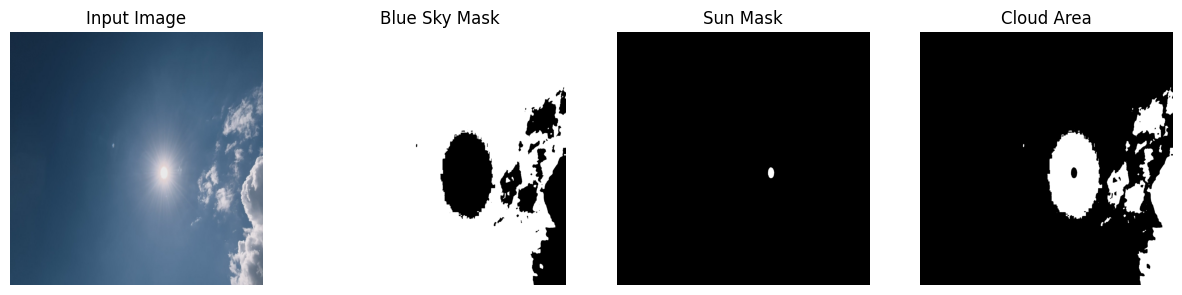

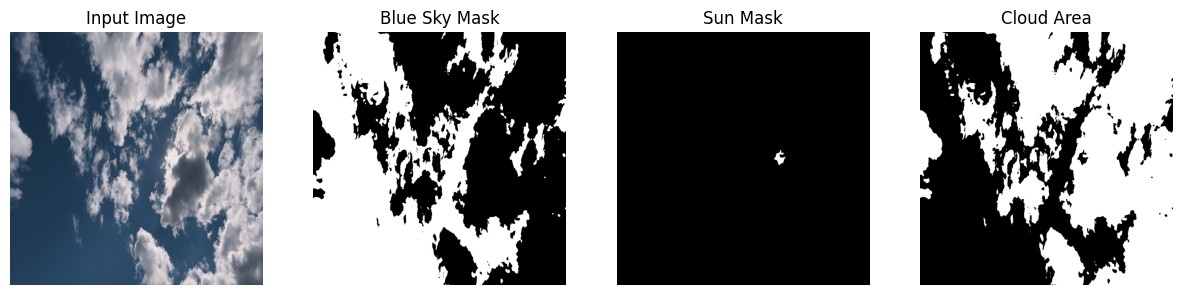

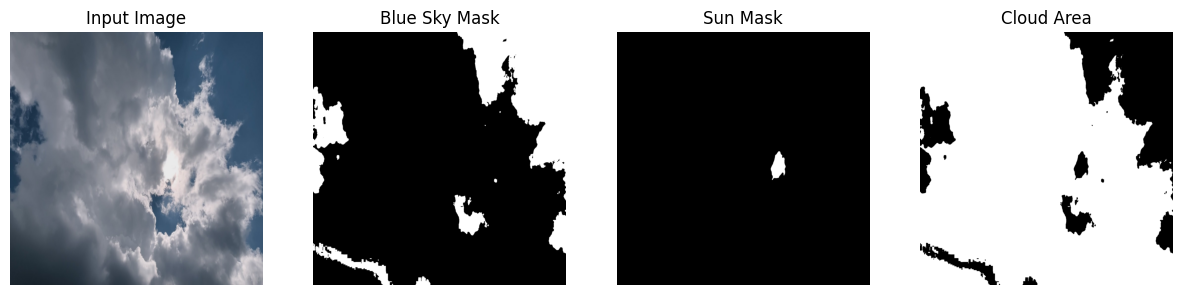

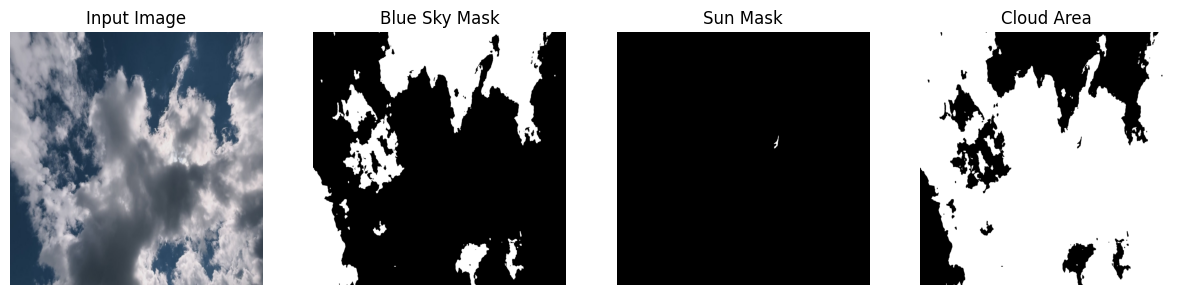

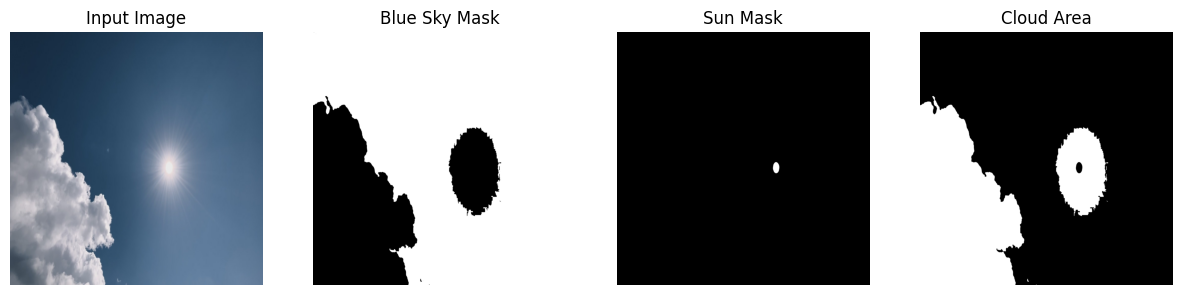

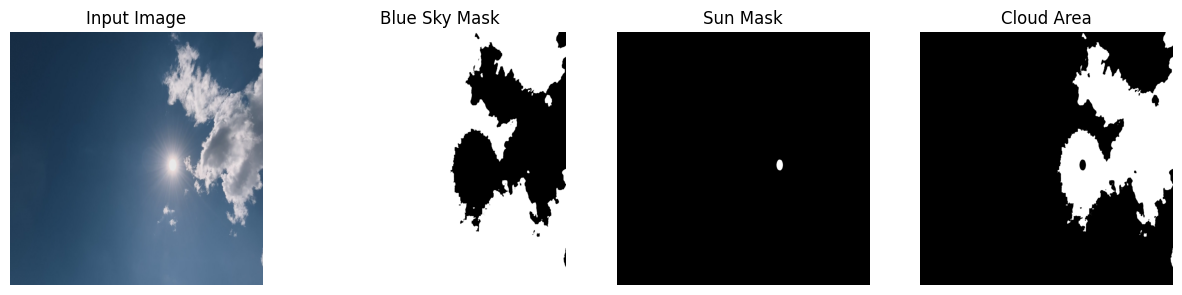

In [ ]:
image_paths_input = [
    '5.jpg',
    '125.jpg',
    '41.jpg',
    '175.jpg',
    '60.jpg',
    '90.jpg'
]

process_images(image_paths_input)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)

        # Create an aura around the sun
        aura_mask = cv2.dilate(sun_mask, kernel, iterations=10)

        return sun_mask, aura_mask
    return None, None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask, aura_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
        else:
            sun_and_blue_sky_removed = blue_sky_removed
            sun_mask = np.zeros((1920, 1920), dtype=np.uint8)  # Create a black sun mask if not detected

        if aura_mask is not None:
            cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, aura_mask))
        else:
            cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
            cloud_area_mask = cloud_area_mask.astype(np.uint8)
            kernel = np.ones((5, 5), np.uint8)
            cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
            plt.title('Input Image')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(blue_sky_mask, cmap='gray')
            plt.title('Blue Sky Mask')
            plt.axis('off')

            '''plt.subplot(1, 5, 3)
            plt.imshow(sun_mask, cmap='gray')
            plt.title('Sun Mask')
            plt.axis('off')

            plt.subplot(1, 5, 4)
            plt.imshow(aura_mask if aura_mask is not None else np.zeros_like(sun_mask), cmap='gray')
            plt.title('Aura Mask')
            plt.axis('off')'''

            plt.subplot(1, 3, 3)
            plt.imshow(cloud_area_mask, cmap='gray')
            plt.title('Cloud Area')
            plt.axis('off')

            plt.show()
        else:
            print("Error: Cloud area mask is None or empty.")

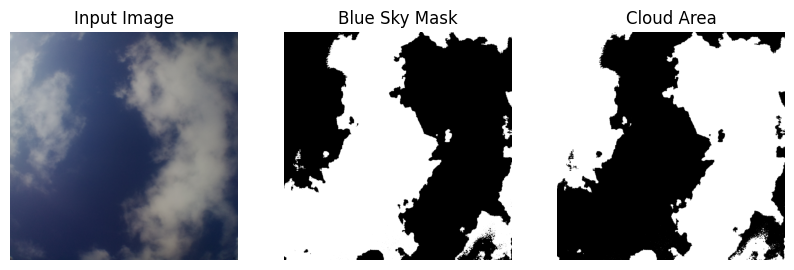

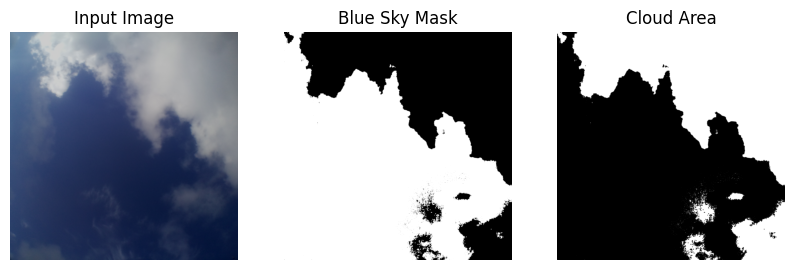

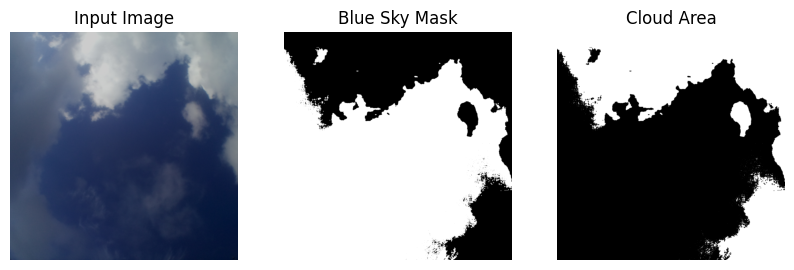

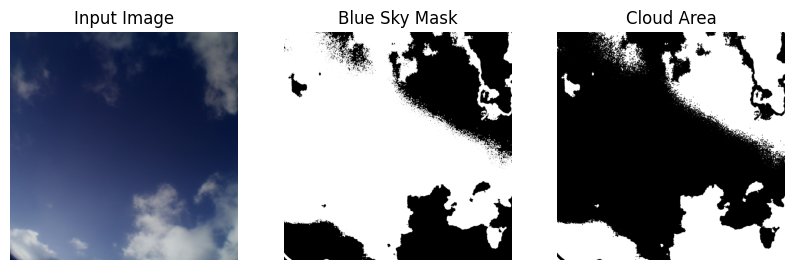

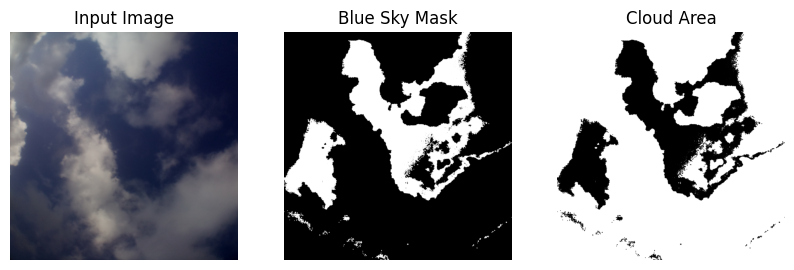

In [ ]:
image_paths_input = [
    '3.jpg',
    '25.jpg',
    '23.jpg',
    '146.jpg',
    '93.jpg'
]

process_images(image_paths_input)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)

        # Create a circular aura around the sun
        (x, y), radius = cv2.minEnclosingCircle(sun_contour)
        center = (int(x), int(y))
        radius = int(radius) + 150  # Increase the radius to create a larger aura
        aura_mask = np.zeros_like(gray)
        cv2.circle(aura_mask, center, radius, 255, -1)

        return sun_mask, aura_mask
    return None, None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask, aura_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
        else:
            sun_and_blue_sky_removed = blue_sky_removed

        if aura_mask is not None:
            cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, aura_mask))
        else:
            cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
            cloud_area_mask = cloud_area_mask.astype(np.uint8)
            kernel = np.ones((5, 5), np.uint8)
            cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)

            plt.figure(figsize=(20, 5))
            plt.subplot(1, 5, 1)
            plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
            plt.title('Input Image')
            plt.axis('off')

            plt.subplot(1, 5, 2)
            plt.imshow(blue_sky_mask, cmap='gray')
            plt.title('Blue Sky Mask')
            plt.axis('off')

            plt.subplot(1, 5, 3)
            plt.imshow(sun_mask, cmap='gray')
            plt.title('Sun Mask')
            plt.axis('off')

            plt.subplot(1, 5, 4)
            plt.imshow(aura_mask, cmap='gray')
            plt.title('Aura Mask')
            plt.axis('off')

            plt.subplot(1, 5, 5)
            plt.imshow(cloud_area_mask, cmap='gray')
            plt.title('Cloud Area')
            plt.axis('off')

            plt.show()
        else:
            print("Error: Cloud area mask is None or empty.")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20, 80, 60])
    upper_blue = np.array([220, 210, 230])
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)

        # Create an elliptical aura around the sun
        ell_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (45, 80))
        aura_mask = cv2.dilate(sun_mask, ell_kernel, iterations=10)  # Adjust iterations as needed

        return sun_mask, aura_mask
    return None, None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask, aura_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
        else:
            sun_and_blue_sky_removed = blue_sky_removed

        if aura_mask is not None:
            cloud_area_mask = cv2.bitwise_not(cv2.bitwise_or(blue_sky_mask, aura_mask))
        else:
            cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
            cloud_area_mask = cloud_area_mask.astype(np.uint8)
            kernel = np.ones((5, 5), np.uint8)
            cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)
            cv2.imwrite(input_path+'.png', cloud_area_mask)

            plt.figure(figsize=(20, 5))
            plt.subplot(1, 5, 1)
            plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
            plt.title('Input Image')
            plt.axis('off')

            plt.subplot(1, 5, 2)
            plt.imshow(blue_sky_mask, cmap='gray')
            plt.title('Blue Sky Mask')
            plt.axis('off')

            plt.subplot(1, 5, 3)
            plt.imshow(sun_mask, cmap='gray')
            plt.title('Sun Mask')
            plt.axis('off')

            plt.subplot(1, 5, 4)
            plt.imshow(aura_mask, cmap='gray')
            plt.title('Aura Mask')
            plt.axis('off')

            plt.subplot(1, 5, 5)
            plt.imshow(cloud_area_mask, cmap='gray')
            plt.title('Cloud Area')
            plt.axis('off')

            plt.show()
        else:
            print("Error: Cloud area mask is None or empty.")

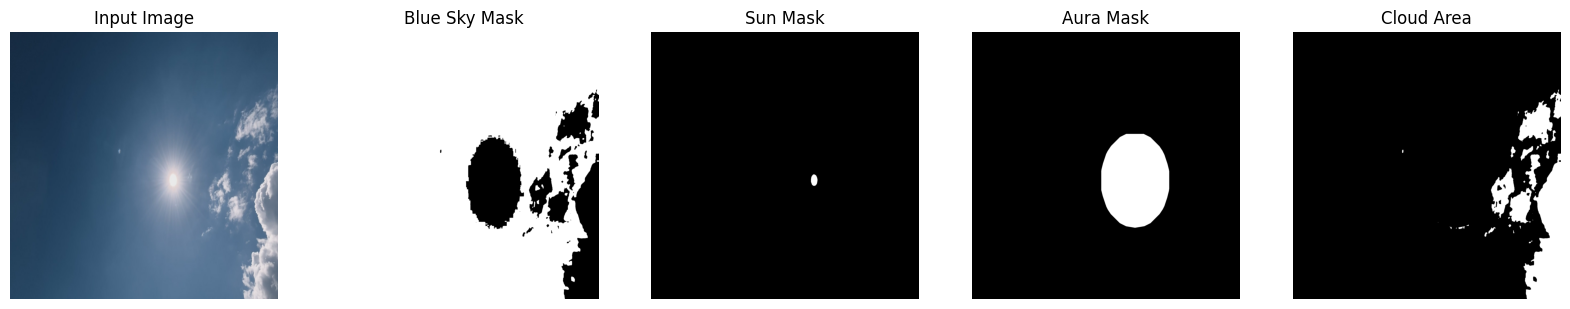

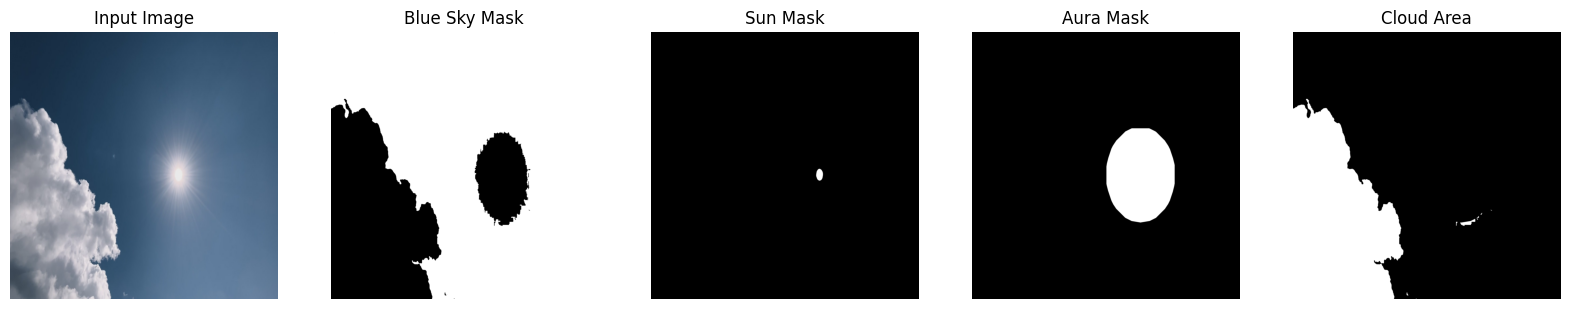

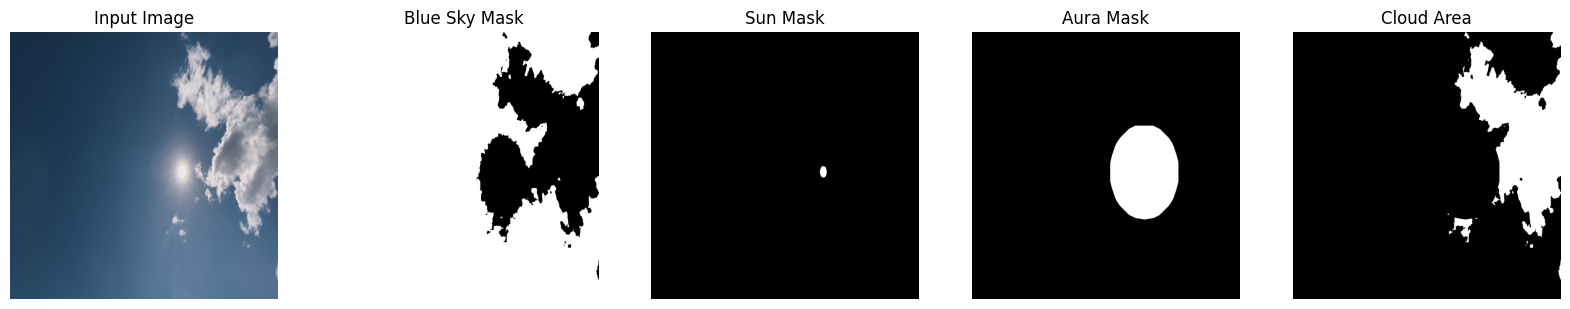

In [ ]:
image_paths_input = [
    '5.jpg',
    '60.jpg',
    '90.jpg'
]

process_images(image_paths_input)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([0, 0, 0])  # Adjusted lower bound for blue sky
    upper_blue = np.array([130, 255, 255])  # Adjusted upper bound for blue sky
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(gray, 100, 100, cv2.THRESH_BINARY)  # Adjusted threshold for sun detection
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None, None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
        else:
            sun_and_blue_sky_removed = blue_sky_removed

        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
            cloud_area_mask = cloud_area_mask.astype(np.uint8)
            kernel = np.ones((5, 5), np.uint8)
            cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)

            plt.figure(figsize=(20, 5))
            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
            plt.title('Input Image')
            plt.axis('off')

            plt.subplot(1, 4, 2)
            plt.imshow(blue_sky_mask, cmap='gray')
            plt.title('Blue Sky Mask')
            plt.axis('off')

            plt.subplot(1, 4, 3)
            plt.imshow(sun_mask, cmap='gray')
            plt.title('Sun Mask')
            plt.axis('off')

            plt.subplot(1, 4, 4)
            plt.imshow(cloud_area_mask, cmap='gray')
            plt.title('Cloud Area')
            plt.axis('off')

            plt.show()
        else:
            print("Error: Cloud area mask is None or empty.")

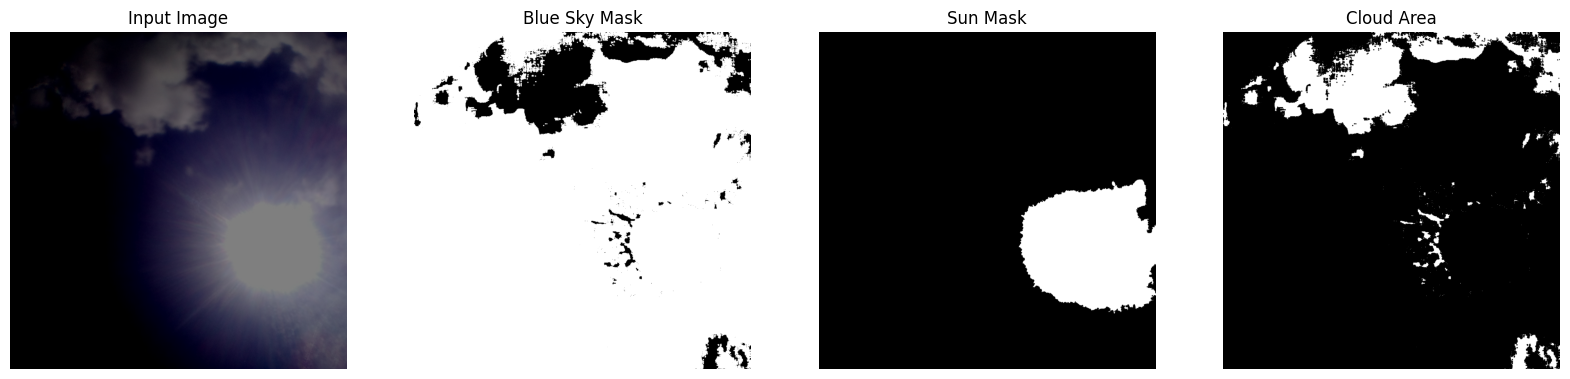

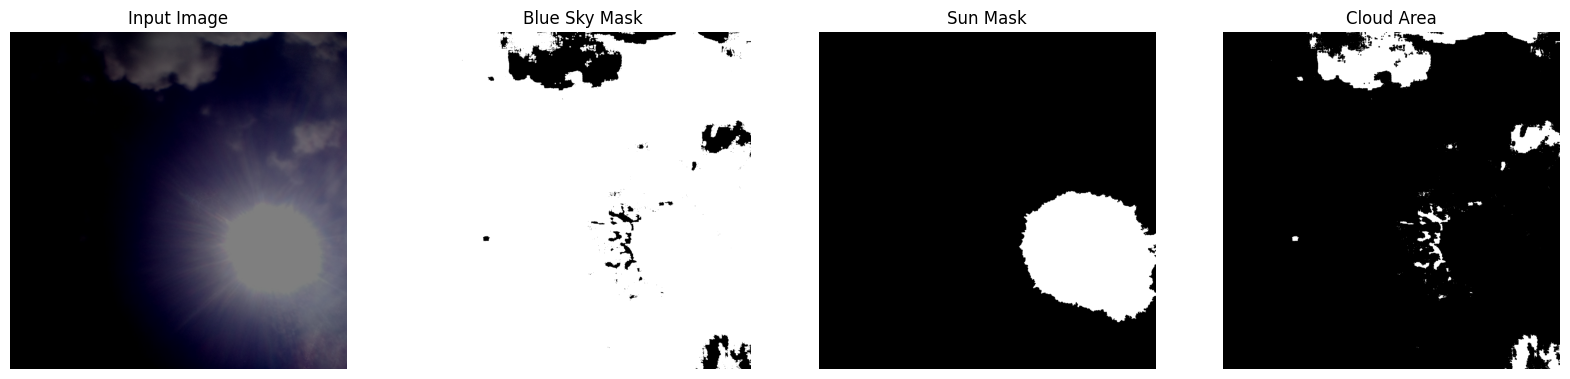

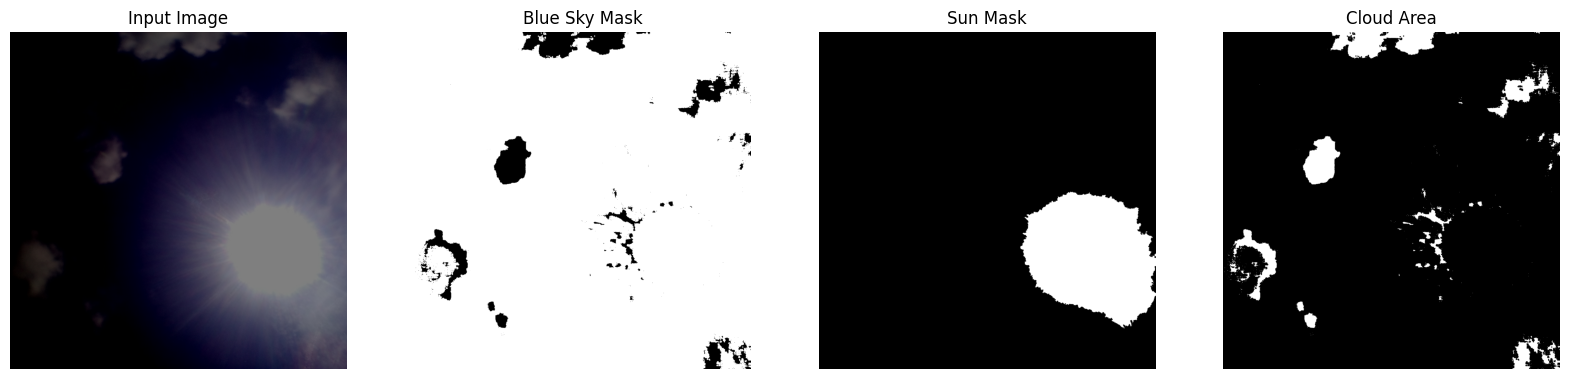

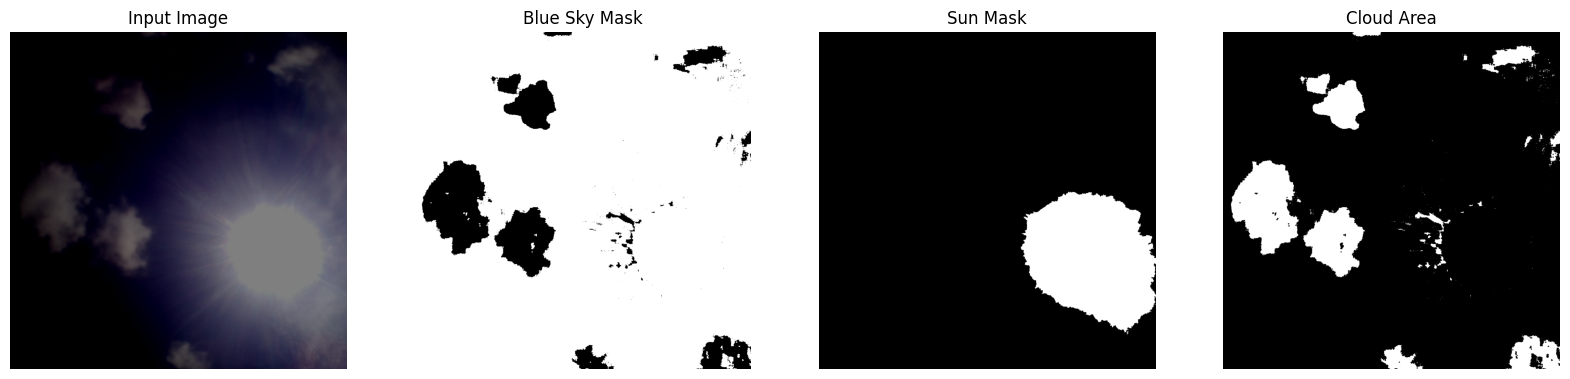

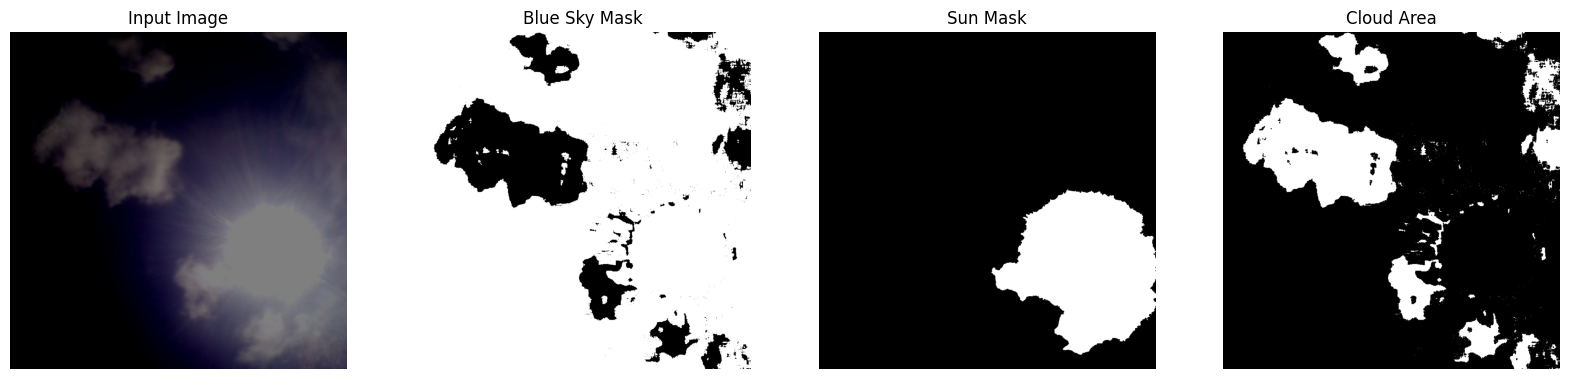

In [ ]:
image_paths_input = ['332.jpg', '333.jpg', '334.jpg', '335.jpg', '336.jpg']

process_images(image_paths_input)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([0, 0, 0])  # Adjusted lower bound for blue sky
    upper_blue = np.array([130, 255, 255])  # Adjusted upper bound for blue sky
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(gray, 100, 100, cv2.THRESH_BINARY)  # Adjusted threshold for sun detection
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None, None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
        else:
            sun_and_blue_sky_removed = blue_sky_removed

        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        # Splitting the classified image into 8x8 matrix and counting pixels
        if cloud_area_mask is not None:
            rows, cols = cloud_area_mask.shape
            partition_size_rows = rows // 8
            partition_size_cols = cols // 8
            partition_counts = np.zeros((8, 8), dtype=int)

            for i in range(8):
                for j in range(8):
                    partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                j * partition_size_cols: (j + 1) * partition_size_cols]
                    partition_counts[i, j] = np.count_nonzero(partition)

            print("Partition Counts:")
            print(partition_counts)

        if cloud_area_mask is not None and cloud_area_mask.shape[0] > 0 and cloud_area_mask.shape[1] > 0:
            cloud_area_mask = cloud_area_mask.astype(np.uint8)
            kernel = np.ones((5, 5), np.uint8)
            cloud_area_mask = cv2.morphologyEx(cloud_area_mask, cv2.MORPH_CLOSE, kernel)

            plt.figure(figsize=(20, 5))
            '''plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
            plt.title('Input Image')
            plt.axis('off')

            plt.subplot(1, 4, 2)
            plt.imshow(blue_sky_mask, cmap='gray')
            plt.title('Blue Sky Mask')
            plt.axis('off')

            plt.subplot(1, 4, 3)
            plt.imshow(sun_mask, cmap='gray')
            plt.title('Sun Mask')
            plt.axis('off')
'''
            plt.subplot(1, 4, 4)
            plt.imshow(cloud_area_mask, cmap='gray')
            plt.title('Cloud Area')
            plt.axis('off')

            plt.show()
        else:
            print("Error: Cloud area mask is None or empty.")

Partition Counts:
[[    2 18707 13908 38261 26159 28880 18751 24172]
 [ 9108 24751 49405 56681 22007     0     0 12916]
 [ 1284   281  4142 16355  3380     0     0  5442]
 [    0     0     6    30   222   274    59  2349]
 [    0     0     0     0  4489  3599   233   365]
 [    0     0     0     1  2397  3586     4     6]
 [    0     0     0     0    16    44     4     0]
 [    0     0     0     0     1     0  3244 18647]]


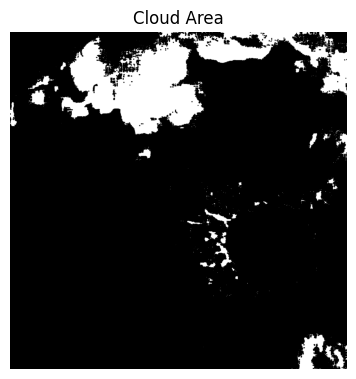

Partition Counts:
[[    0    10 24056 46101 38944 11854  2392  7673]
 [    0   589  5070 12955  9963     0     0     0]
 [    0     0     0     0     0   654  4106 25601]
 [    0     0     0     0   336     6   992    33]
 [    0   816     0     0  6339  5443   510     9]
 [    0     0     0     0  2839  4343     0     1]
 [    0     0     0     0     5   563     0     0]
 [    0     0     0     0    12     0  3297 22540]]


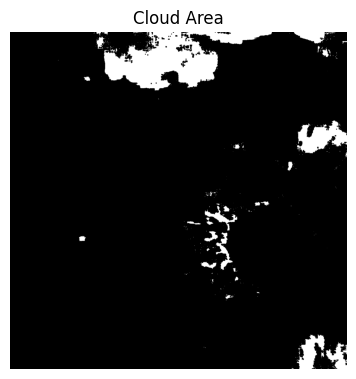

Partition Counts:
[[    0     0  8063 26779 23177   706     0  1075]
 [    3     0     0     0     0   156 13721 14925]
 [    0     9 15171     0     1    41   119  3367]
 [    0  1587 20675     0   436    10     7   527]
 [ 4464     0     0     7  5130  5066   570     6]
 [12353  9542     0     0  1642  3445     0     7]
 [ 3371  2399  3480     0     0   304     3     0]
 [    0     0   163     0     0     0  1868 18030]]


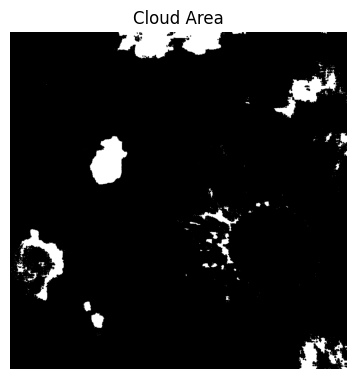

Partition Counts:
[[    0     0    40  3209     0   537 14400  8020]
 [    0   870 38369 12911     0     0    35   403]
 [    0     0  6360  3250    12     3     0  5852]
 [27399 30668     0     0    45     7    18   592]
 [32244 38787 37246  8592  3721  3927   433    13]
 [ 1538  4653 31029  5740  1142  2810     0     7]
 [    0     0     0     0     4    36     6     0]
 [    0     0     0  3822 12908     0  4938 32895]]


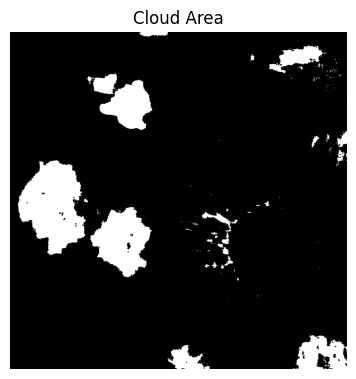

Partition Counts:
[[    0     0 22371 28904     0   201 10727 13649]
 [    0 14777  1280  6704     0     0     0 25186]
 [18965 56094 49640 33176  4038   364    70 28399]
 [ 2113 33140 49768 53621  2446   287   751  6421]
 [    0     0  2344  3025  4484  4587   830   304]
 [    0     0     0  1044 25234  3040     0  1361]
 [    0     0     0    30 32368  4785  3103    48]
 [    0     0     0     0    20 10762 24144 16413]]


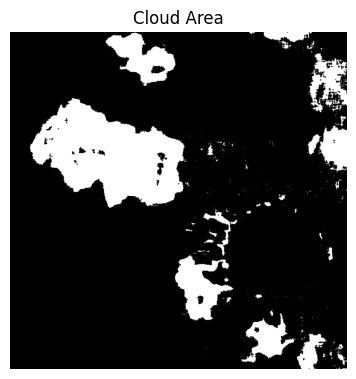

Input image not found at path: 337.jpg


In [ ]:
image_paths_input = ['332.jpg', '333.jpg', '334.jpg', '335.jpg', '336.jpg', '337.jpg']

process_images(image_paths_input)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([0, 0, 0])  # Adjusted lower bound for blue sky
    upper_blue = np.array([130, 255, 255])  # Adjusted upper bound for blue sky
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(gray, 100, 100, cv2.THRESH_BINARY)  # Adjusted threshold for sun detection
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            sun_and_blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask)
        else:
            sun_and_blue_sky_removed = blue_sky_removed

        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        # Splitting the classified image into 8x8 matrix and counting pixels
        if cloud_area_mask is not None:
            rows, cols = cloud_area_mask.shape
            partition_size_rows = rows // 8
            partition_size_cols = cols // 8
            partition_counts = np.zeros((8, 8), dtype=int)

            for i in range(8):
                for j in range(8):
                    partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                j * partition_size_cols: (j + 1) * partition_size_cols]
                    partition_counts[i, j] = np.count_nonzero(partition)

            print("Partition Counts:")
            print(partition_counts)

            # Draw grid lines and counts on the input image
            for i in range(8):
                for j in range(8):
                    # Coordinates for partition grid lines
                    start_x = j * partition_size_cols
                    start_y = i * partition_size_rows
                    end_x = (j + 1) * partition_size_cols
                    end_y = (i + 1) * partition_size_rows

                    # Draw grid rectangle
                    cv2.rectangle(input_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

                    # Display the number of cloud pixels in the center of each partition
                    cloud_count = partition_counts[i, j]
                    text_x = start_x + partition_size_cols // 2 - 20
                    text_y = start_y + partition_size_rows // 2 + 10
                    cv2.putText(input_image, str(cloud_count), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Display the result
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.title('Input Image with Partition Counts')
        plt.axis('off')
        plt.show()

Partition Counts:
[[    0     0     0     0     1 14859 16036 18515]
 [    0     2     0     0     0     0  5462  2309]
 [   27     0     0     0     9   355  1402 11008]
 [    0  2576     0     0  1032  2816   686     0]
 [12769 28287  1110     1 12934  2068    81     1]
 [11622 39148  2652     0  5373  1162    23    25]
 [19343 18928 27124     0   567   432     0    65]
 [ 2228 10144 19762     0     0     0  2723  3192]]


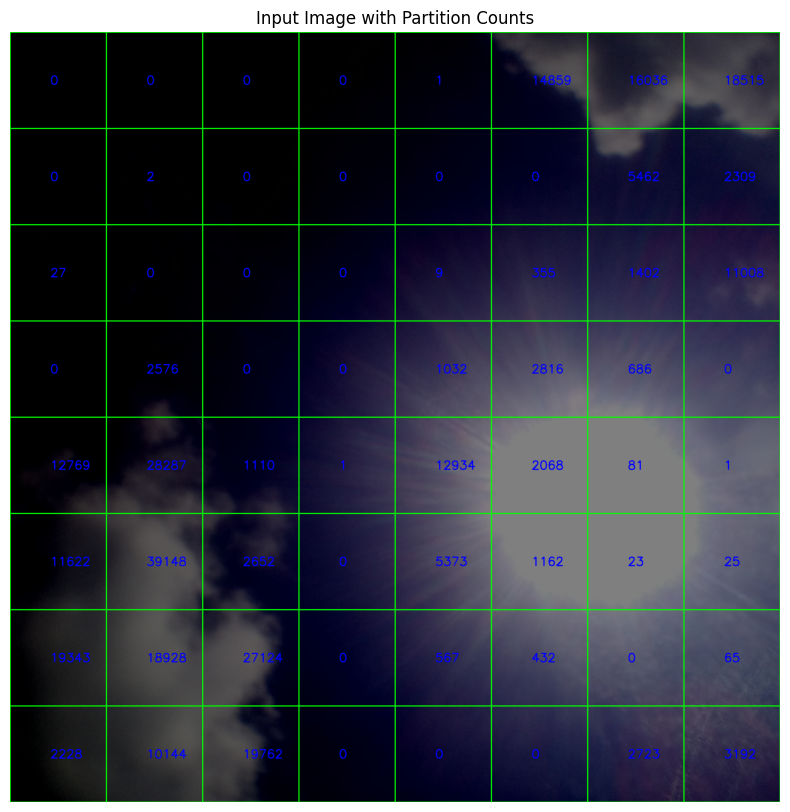

Partition Counts:
[[    0    10 24056 46101 38944 11854  2392  7673]
 [    0   589  5070 12955  9963     0     0     0]
 [    0     0     0     0     0   654  4106 25601]
 [    0     0     0     0   336     6   992    33]
 [    0   816     0     0  6339  5443   510     9]
 [    0     0     0     0  2839  4343     0     1]
 [    0     0     0     0     5   563     0     0]
 [    0     0     0     0    12     0  3297 22540]]


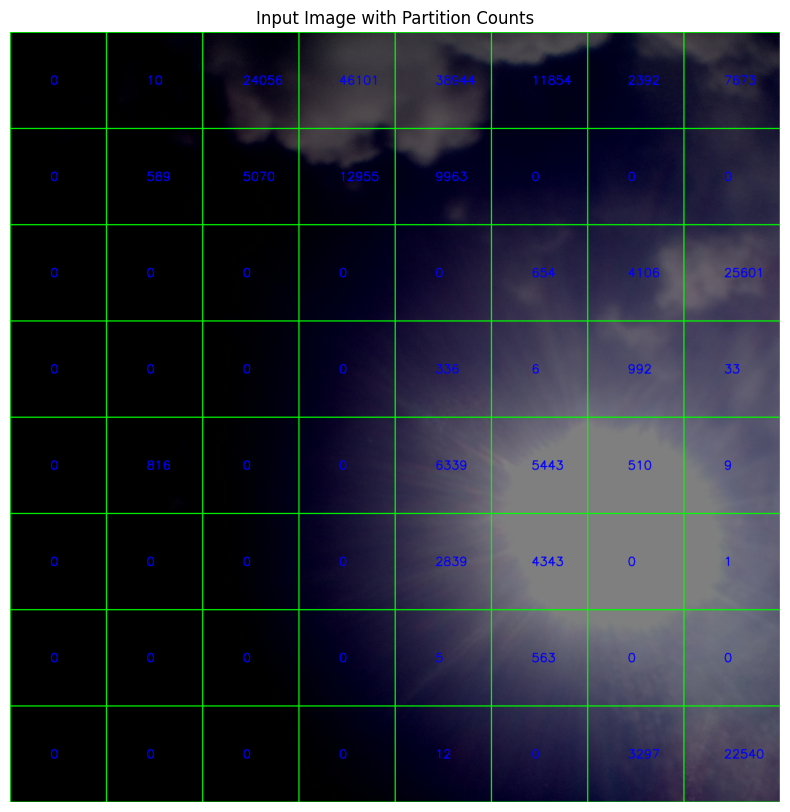

In [ ]:
image_paths = ['310.jpg', '333.jpg']
process_images(image_paths)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([0, 0, 0])  # Adjusted lower bound for blue sky
    upper_blue = np.array([130, 255, 255])  # Adjusted upper bound for blue sky
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (25, 25), 0)
    _, sun_mask = cv2.threshold(blurred, 240, 255, cv2.THRESH_BINARY)  # Adjusted threshold for sun detection
    kernel = np.ones((5, 5), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            # Exclude sun from the cloud mask
            sun_mask_inv = cv2.bitwise_not(sun_mask)
            blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask_inv)

        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        # Remove sun pixels from cloud detection
        if sun_mask is not None:
            cloud_area_mask = cv2.bitwise_and(cloud_area_mask, cloud_area_mask, mask=sun_mask_inv)

        # Splitting the classified image into 8x8 matrix and counting pixels
        if cloud_area_mask is not None:
            rows, cols = cloud_area_mask.shape
            partition_size_rows = rows // 8
            partition_size_cols = cols // 8
            partition_counts = np.zeros((8, 8), dtype=int)

            for i in range(8):
                for j in range(8):
                    partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                j * partition_size_cols: (j + 1) * partition_size_cols]
                    partition_counts[i, j] = np.count_nonzero(partition)

            print("Partition Counts:")
            print(partition_counts)

            # Draw grid lines and counts on the input image
            for i in range(8):
                for j in range(8):
                    # Coordinates for partition grid lines
                    start_x = j * partition_size_cols
                    start_y = i * partition_size_rows
                    end_x = (j + 1) * partition_size_cols
                    end_y = (i + 1) * partition_size_rows

                    # Draw grid rectangle
                    cv2.rectangle(input_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

                    # Display the number of cloud pixels in the center of each partition
                    cloud_count = partition_counts[i, j]
                    text_x = start_x + partition_size_cols // 2 - 20
                    text_y = start_y + partition_size_rows // 2 + 10
                    cv2.putText(input_image, str(cloud_count), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Display the result
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([0, 0, 0])  # Adjusted lower bound for blue sky
    upper_blue = np.array([130, 255, 255])  # Adjusted upper bound for blue sky
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    _, sun_mask = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Adjusted threshold for sun detection
    kernel = np.ones((10, 10), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        if sun_mask is not None:
            sun_mask_inv = cv2.bitwise_not(sun_mask)
            blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=sun_mask_inv)
        else:
            blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        if sun_mask is not None:
            cloud_area_mask = cv2.bitwise_and(cloud_area_mask, cloud_area_mask, mask=sun_mask_inv)

        # Splitting the classified image into 8x8 matrix and counting pixels
        if cloud_area_mask is not None:
            rows, cols = cloud_area_mask.shape
            partition_size_rows = rows // 8
            partition_size_cols = cols // 8
            partition_counts = np.zeros((8, 8), dtype=int)
            sun_partition_counts = np.zeros((8, 8), dtype=int)

            for i in range(8):
                for j in range(8):
                    partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                j * partition_size_cols: (j + 1) * partition_size_cols]
                    partition_counts[i, j] = np.count_nonzero(partition)

                    if sun_mask is not None:
                        sun_partition = sun_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                 j * partition_size_cols: (j + 1) * partition_size_cols]
                        sun_partition_counts[i, j] = np.count_nonzero(sun_partition)

            print("Partition Counts (Clouds):")
            print(partition_counts)
            print("Partition Counts (Sun):")
            print(sun_partition_counts)

            # Draw grid lines and counts on the input image
            for i in range(8):
                for j in range(8):
                    # Coordinates for partition grid lines
                    start_x = j * partition_size_cols
                    start_y = i * partition_size_rows
                    end_x = (j + 1) * partition_size_cols
                    end_y = (i + 1) * partition_size_rows

                    # Draw grid rectangle
                    cv2.rectangle(input_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

                    # Display the number of cloud and sun pixels in the center of each partition
                    cloud_count = partition_counts[i, j]
                    sun_count = sun_partition_counts[i, j]

                    text_x = start_x + partition_size_cols // 2 - 20
                    text_y = start_y + partition_size_rows // 2 + 10

                    cv2.putText(input_image, str(cloud_count), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)  # Cloud count in red
                    cv2.putText(input_image, str(sun_count), (text_x, text_y + 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 2)  # Sun count in yellow

            # Add legend
            cv2.rectangle(input_image, (50, 50), (300, 150), (255, 255, 255), -1)  # White box for legend background
            cv2.putText(input_image, 'Cloud Count', (60, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)
            cv2.putText(input_image, 'Sun Count', (60, 130), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 2)

        # Display the input image with grid lines and counts
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

Partition Counts (Clouds):
[[  241    32   354     1   161     0     0     0]
 [22285     0 22084  2967     0     0     0     0]
 [23243     0  6726  3715     0     0     0     0]
 [ 9608     1     0     0     0     0     0     0]
 [ 9401     0     0     0     0     0     0     0]
 [31996     0     0     0     0     0     0     0]
 [  300  2502   244     2  3040   241     0     0]
 [ 1704  5230  9926     0   423     0     0     0]]
Partition Counts (Sun):
[[    0     0     0     0 24397 57567 57600 57600]
 [    0     0 13111 10274 45074 57600 57600 57600]
 [    0     0  9669 28614 35509 57600 57600 57600]
 [    0     0     0     0 13482 51087 57600 57600]
 [    0     0     0     0     0  2860 18325 17006]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


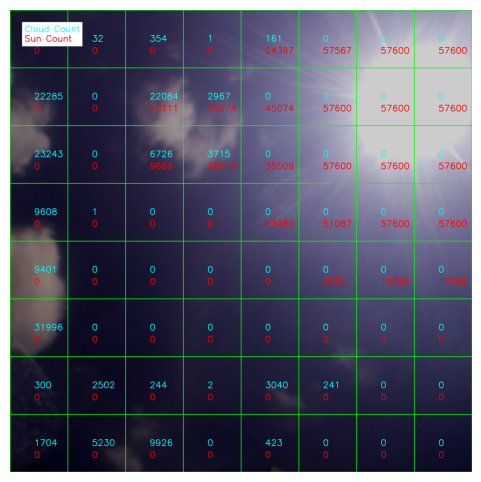

Partition Counts (Clouds):
[[  123  1454  1591     0     0  4254  8247 18856]
 [11935 11010     0     0   869 42000 27799 47948]
 [ 6359  4066     0     4  6963 23385 19454 36953]
 [    0     0     0  1833 22206 29860  5971  5435]
 [    0     0 13976 39342  4265  3588   162  1254]
 [    0     0 23695 46620  9051     0     0    30]
 [    0     0     0 13209  1317  1098    50    10]
 [    0     0     0     0   162   617   438 32044]]
Partition Counts (Sun):
[[    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1897  2139     0]
 [    0     0     0     0   164 42883 55926 28283]
 [    0     0     0     0   256 52256 57600 52287]
 [    0     0     0     0     0 14078 36161 20110]
 [    0     0     0     0     0     0     0     0]]


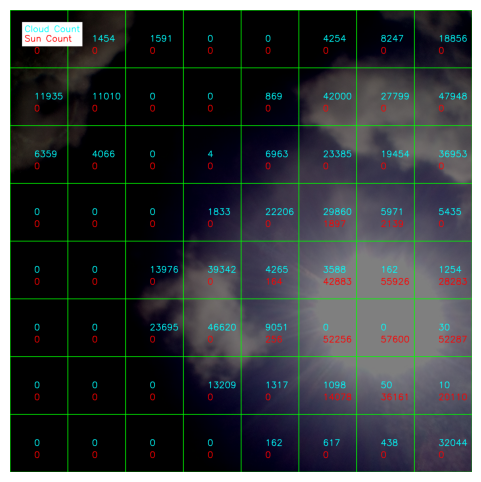

In [ ]:
image_paths = ['300.jpg', '348.jpg']
process_images(image_paths)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([0, 0, 0])  # Adjusted lower bound for blue sky
    upper_blue = np.array([130, 255, 255])  # Adjusted upper bound for blue sky
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    _, sun_mask = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Adjusted threshold for sun detection
    kernel = np.ones((10, 10), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        if sun_mask is not None:
            sun_mask_inv = cv2.bitwise_not(sun_mask)
            blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=sun_mask_inv)
        else:
            blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        if sun_mask is not None:
            cloud_area_mask = cv2.bitwise_and(cloud_area_mask, cloud_area_mask, mask=sun_mask_inv)

        # Splitting the classified image into 8x8 matrix and counting pixels
        if cloud_area_mask is not None:
            rows, cols = cloud_area_mask.shape
            partition_size_rows = rows // 8
            partition_size_cols = cols // 8
            partition_counts = np.zeros((8, 8), dtype=int)
            sun_partition_counts = np.zeros((8, 8), dtype=int)

            for i in range(8):
                for j in range(8):
                    partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                j * partition_size_cols: (j + 1) * partition_size_cols]
                    partition_counts[i, j] = np.count_nonzero(partition)

                    if sun_mask is not None:
                        sun_partition = sun_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                 j * partition_size_cols: (j + 1) * partition_size_cols]
                        sun_partition_counts[i, j] = np.count_nonzero(sun_partition)

            print("Partition Counts (Clouds):")
            print(partition_counts)
            print("Partition Counts (Sun):")
            print(sun_partition_counts)

            # Draw grid lines and counts on the input image
            for i in range(8):
                for j in range(8):
                    # Coordinates for partition grid lines
                    start_x = j * partition_size_cols
                    start_y = i * partition_size_rows
                    end_x = (j + 1) * partition_size_cols
                    end_y = (i + 1) * partition_size_rows

                    # Draw grid rectangle
                    cv2.rectangle(input_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

                    # Display the number of cloud and sun pixels in the center of each partition
                    cloud_count = partition_counts[i, j]
                    sun_count = sun_partition_counts[i, j]

                    text_x = start_x + partition_size_cols // 2 - 20
                    text_y = start_y + partition_size_rows // 2 + 10

                    cv2.putText(input_image, str(cloud_count), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)  # Cloud count in red
                    cv2.putText(input_image, str(sun_count), (text_x, text_y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)  # Sun count in yellow

        # Display the input image with grid lines and counts
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

Partition Counts (Clouds):
[[  241    32   354     1   161     0     0     0]
 [22285     0 22084  2967     0     0     0     0]
 [23243     0  6726  3715     0     0     0     0]
 [ 9608     1     0     0     0     0     0     0]
 [ 9401     0     0     0     0     0     0     0]
 [31996     0     0     0     0     0     0     0]
 [  300  2502   244     2  3040   241     0     0]
 [ 1704  5230  9926     0   423     0     0     0]]
Partition Counts (Sun):
[[    0     0     0     0 24397 57567 57600 57600]
 [    0     0 13111 10274 45074 57600 57600 57600]
 [    0     0  9669 28614 35509 57600 57600 57600]
 [    0     0     0     0 13482 51087 57600 57600]
 [    0     0     0     0     0  2860 18325 17006]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


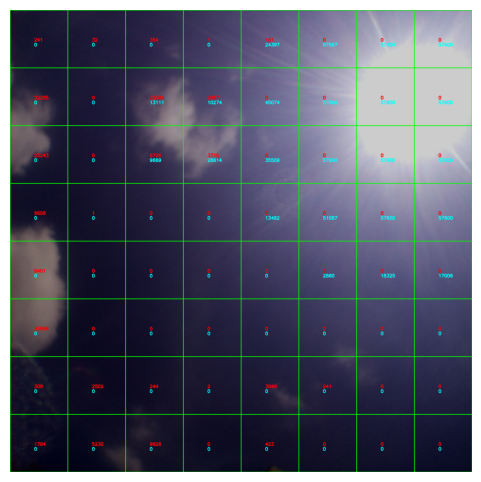

Partition Counts (Clouds):
[[  123  1454  1591     0     0  4254  8247 18856]
 [11935 11010     0     0   869 42000 27799 47948]
 [ 6359  4066     0     4  6963 23385 19454 36953]
 [    0     0     0  1833 22206 29860  5971  5435]
 [    0     0 13976 39342  4265  3588   162  1254]
 [    0     0 23695 46620  9051     0     0    30]
 [    0     0     0 13209  1317  1098    50    10]
 [    0     0     0     0   162   617   438 32044]]
Partition Counts (Sun):
[[    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1897  2139     0]
 [    0     0     0     0   164 42883 55926 28283]
 [    0     0     0     0   256 52256 57600 52287]
 [    0     0     0     0     0 14078 36161 20110]
 [    0     0     0     0     0     0     0     0]]


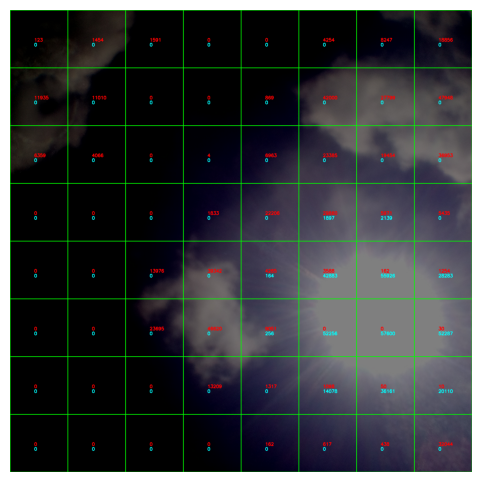

In [ ]:
image_paths = ['300.jpg', '348.jpg']
process_images(image_paths)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def detect_blue_sky(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([0, 0, 0])  # Adjusted lower bound for blue sky
    upper_blue = np.array([130, 255, 255])  # Adjusted upper bound for blue sky
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    kernel = np.ones((5, 5), np.uint8)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)
    return blue_mask

def detect_sun(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    _, sun_mask = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Adjusted threshold for sun detection
    kernel = np.ones((10, 10), np.uint8)
    sun_mask = cv2.morphologyEx(sun_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        sun_contour = max(contours, key=cv2.contourArea)
        sun_mask = np.zeros_like(gray)
        cv2.drawContours(sun_mask, [sun_contour], -1, 255, -1)
        return sun_mask
    return None

def process_images(image_paths_input):
    for input_path in image_paths_input:
        input_image = cv2.imread(input_path)
        if input_image is None:
            print(f"Input image not found at path: {input_path}")
            continue

        input_image = cv2.resize(input_image, (1920, 1920))

        blue_sky_mask = detect_blue_sky(input_image)
        sun_mask = detect_sun(input_image)

        blue_sky_removed = cv2.bitwise_and(input_image, input_image, mask=blue_sky_mask)

        if sun_mask is not None:
            # Exclude sun from the cloud mask
            sun_mask_inv = cv2.bitwise_not(sun_mask)
            blue_sky_removed = cv2.bitwise_and(blue_sky_removed, blue_sky_removed, mask=sun_mask_inv)

        cloud_area_mask = cv2.bitwise_not(blue_sky_mask)

        # Remove sun pixels from cloud detection
        if sun_mask is not None:
            cloud_area_mask = cv2.bitwise_and(cloud_area_mask, cloud_area_mask, mask=sun_mask_inv)

        # Splitting the classified image into 8x8 matrix and counting pixels
        if cloud_area_mask is not None:
            rows, cols = cloud_area_mask.shape
            partition_size_rows = rows // 8
            partition_size_cols = cols // 8
            partition_counts = np.zeros((8, 8), dtype=int)
            sun_partition_counts = np.zeros((8, 8), dtype=int)

            for i in range(8):
                for j in range(8):
                    partition = cloud_area_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                j * partition_size_cols: (j + 1) * partition_size_cols]
                    partition_counts[i, j] = np.count_nonzero(partition)

                    if sun_mask is not None:
                        sun_partition = sun_mask[i * partition_size_rows: (i + 1) * partition_size_rows,
                                                 j * partition_size_cols: (j + 1) * partition_size_cols]
                        sun_partition_counts[i, j] = np.count_nonzero(sun_partition)

            # Draw grid lines and counts on the input image
            for i in range(8):
                for j in range(8):
                    # Coordinates for partition grid lines
                    start_x = j * partition_size_cols
                    start_y = i * partition_size_rows
                    end_x = (j + 1) * partition_size_cols
                    end_y = (i + 1) * partition_size_rows

                    # Draw grid rectangle
                    cv2.rectangle(input_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

                    # Display the number of cloud pixels (blue) in the center of each partition
                    cloud_count = partition_counts[i, j]
                    text_x = start_x + partition_size_cols // 2 - 20
                    text_y = start_y + partition_size_rows // 2 - 20
                    cv2.putText(input_image, str(cloud_count), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

                    # Display the number of sun pixels (red) below the cloud count
                    if sun_mask is not None:
                        sun_count = sun_partition_counts[i, j]
                        cv2.putText(input_image, str(sun_count), (text_x, text_y + 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Create a small legend
        legend_elements = [
            Patch(facecolor='blue', edgecolor='blue', label='Cloud Pixels'),
            Patch(facecolor='red', edgecolor='red', label='Sun Pixels')
        ]

        # Adjust plot layout to position the legend outside the image
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        ax.axis('off')

        # Add legend outside the image
        plt.legend(handles=legend_elements, loc='center left', fontsize='medium', frameon=True, bbox_to_anchor=(1, 0.5))

        # Adjust layout to prevent the plot from overlapping
        plt.tight_layout(rect=[0, 0, 0.8, 1])
        plt.show()

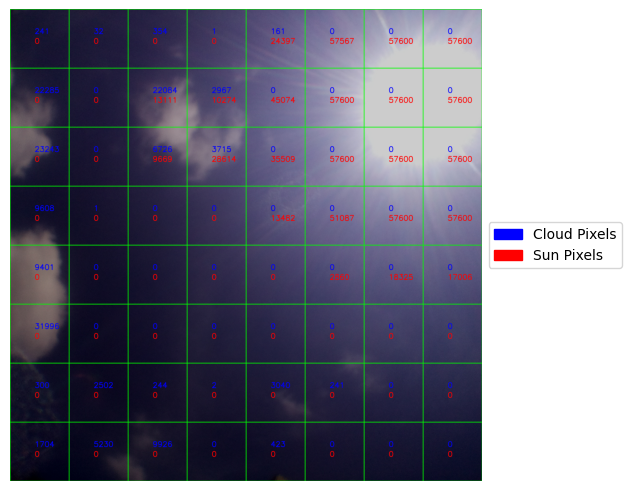

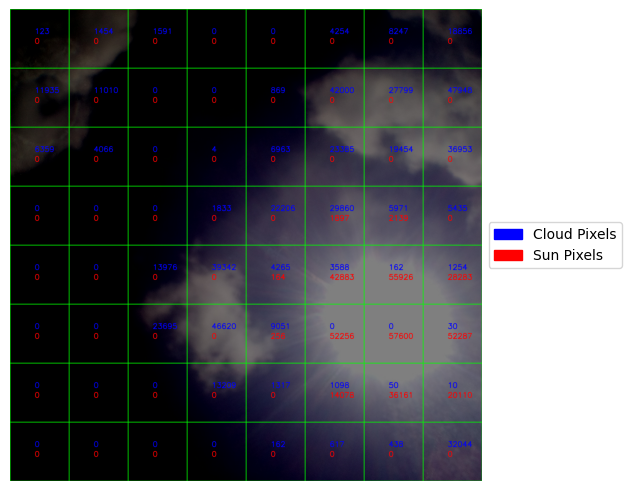

In [ ]:
image_paths = ['300.jpg', '348.jpg']
process_images(image_paths)